# Amazon Rekognition
Amazon Rekognition is a powerful image and video analysis service powered by deep learning. It provides APIs for detecting objects, people, text, scenes, and activities in images and videos. It can also perform facial analysis, compare faces, and recognize celebrities. Amazon Rekognition is used for a wide range of applications, from content moderation to identity verification.

### Introduction
Amazon Rekognition is an effective solution for a variety of image and video analysis tasks, especially those involving facial recognition, object detection, and text extraction. Here's a summary of the key examples provided:

1. **Detect Labels in an Image**: Identifying objects, scenes, and people in images.
2. **Facial Analysis**: Extracting attributes like age, gender, emotions, etc., from facial images.
3. **Compare Faces**: Comparing two images to determine if they contain the same individual.
4. **Detect Text in an Image**: Detecting and extracting text in images, such as identifying names and account numbers from documents.

In the **banking sector**, Rekognition can play a key role in:
- Automating **KYC** processes through facial comparison between documents and selfies.
- Enhancing **security** by using video analysis for monitoring physical bank branches.
- Improving **fraud detection** by preventing multiple accounts under the same identity.

These capabilities not only help banks offer more streamlined and secure customer experiences but also aid in complying with regulations and reducing fraud risks.

### Use Cases for Amazon Rekognition
**General Use Cases**:
1. **Image Moderation**: Automatically detect inappropriate content in user-generated images and videos.
2. **Facial Recognition for Authentication**: Compare and verify faces to authenticate users.
3. **Object and Scene Detection**: Identify objects and scenes for automation in various sectors, such as surveillance and quality inspection.

**Banking-Specific Use Cases**:
1. **KYC (Know Your Customer)**: Banks can use Rekognition to perform facial matching between customer-provided documents and their photos for identity verification during onboarding.
2. **Fraud Detection**: Rekognition can be used to compare facial data to detect if multiple accounts are being created by the same person to prevent fraudulent activity.
3. **Branch Security**: Video analysis to monitor branch security, identifying unauthorized individuals or suspicious activities.

### Step 1: Set Up AWS Credentials and Create the Rekognition Client
First, create an AWS Rekognition client using your root keys:

In [ ]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace these with your AWS access credentials
AWS_ACCESS_KEY_ID = "AKIAQX2TKG3"
AWS_SECRET_ACCESS_KEY = "UeFcS0szPhEQjUn"
AWS_REGION_NAME = "us-west-2"

# Create the AWS Rekognition client once using root keys
rekognition_client = boto3.client(
    'rekognition',
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_REGION_NAME
)

### Step 2: Use the Client for Amazon Rekognition Examples

#### Example 1: Detect Labels in an Image
This example demonstrates how to detect objects, people, and scenes in an image.

In [ ]:
image_path = 'elon3.jpg'

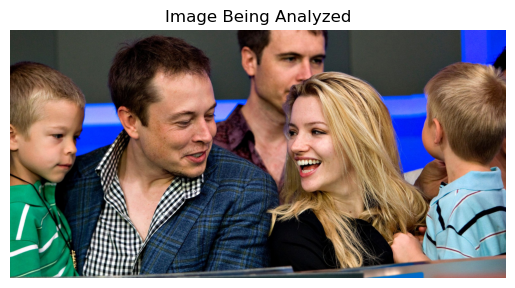

In [7]:
# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Image Being Analyzed")
plt.show()

In [8]:
# Open image file and read its bytes
with open(image_path, 'rb') as image:
    image_bytes = image.read()

# Detect labels in the image
response = rekognition_client.detect_labels(
    Image={'Bytes': image_bytes},
    MaxLabels=5,
    MinConfidence=70
)

# Print detected labels
print("Detected Labels:")
for label in response['Labels']:
    print(f"Label: {label['Name']}, Confidence: {label['Confidence']:.2f}%")

Detected Labels:
Label: Head, Confidence: 99.96%
Label: Person, Confidence: 99.96%
Label: Face, Confidence: 99.95%
Label: Happy, Confidence: 99.91%
Label: Laughing, Confidence: 99.73%


#### Example 2: Facial Analysis
Amazon Rekognition can analyze facial features in an image, such as emotions, gender, and facial landmarks.

In [5]:
# Open image file and read its bytes
with open(image_path, 'rb') as image:
    image_bytes = image.read()

# Perform facial analysis
response = rekognition_client.detect_faces(
    Image={'Bytes': image_bytes},
    Attributes=['ALL']
)

# Print facial attributes
for face_detail in response['FaceDetails']:
    print(f"Detected Face: Confidence {face_detail['Confidence']:.2f}%")
    print(f"  Emotions: {[emotion['Type'] for emotion in face_detail['Emotions']]}")
    print(f"  Gender: {face_detail['Gender']['Value']}")
    print(f"  Age Range: {face_detail['AgeRange']['Low']} - {face_detail['AgeRange']['High']} years")

Detected Face: Confidence 100.00%
  Emotions: ['HAPPY', 'SURPRISED', 'CALM', 'SAD', 'CONFUSED', 'DISGUSTED', 'ANGRY', 'FEAR']
  Gender: Male
  Age Range: 24 - 30 years
Detected Face: Confidence 100.00%
  Emotions: ['HAPPY', 'SURPRISED', 'CALM', 'CONFUSED', 'ANGRY', 'DISGUSTED', 'SAD', 'FEAR']
  Gender: Female
  Age Range: 21 - 27 years
Detected Face: Confidence 100.00%
  Emotions: ['CALM', 'SAD', 'CONFUSED', 'ANGRY', 'DISGUSTED', 'HAPPY', 'SURPRISED', 'FEAR']
  Gender: Male
  Age Range: 27 - 35 years
Detected Face: Confidence 100.00%
  Emotions: ['CALM', 'SAD', 'CONFUSED', 'HAPPY', 'ANGRY', 'SURPRISED', 'DISGUSTED', 'FEAR']
  Gender: Male
  Age Range: 4 - 8 years


#### Example 3: Compare Faces
This example shows how to compare two images to determine if they contain the same person. This can be useful for identity verification.

In [12]:
source_image_path = 'elon1.jpg'
target_image_path = 'elon5.jpg'

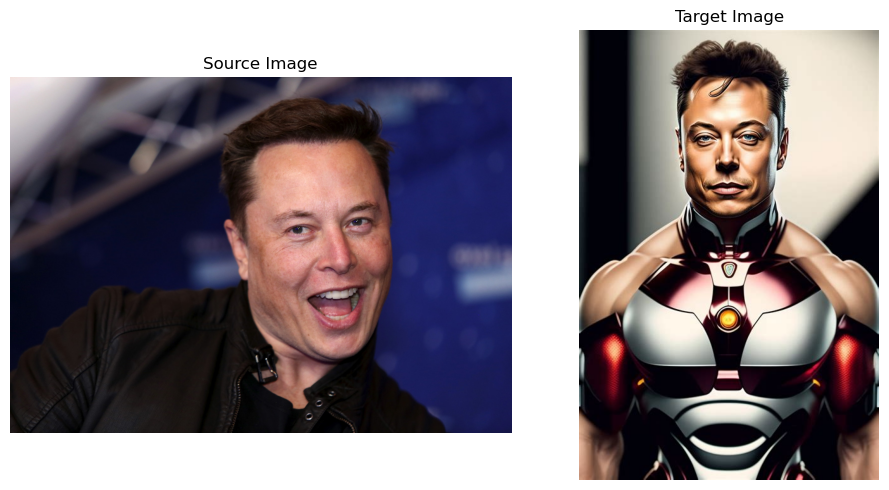

In [13]:
# Display the source and target images side-by-side for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Load and display the source image
source_img = mpimg.imread(source_image_path)
axes[0].imshow(source_img)
axes[0].axis('off')  # Hide axis
axes[0].set_title("Source Image")

# Load and display the target image
target_img = mpimg.imread(target_image_path)
axes[1].imshow(target_img)
axes[1].axis('off')  # Hide axis
axes[1].set_title("Target Image")

plt.tight_layout()
plt.show()

In [14]:
# Open source and target images and read their bytes
with open(source_image_path, 'rb') as source_image:
    source_bytes = source_image.read()

with open(target_image_path, 'rb') as target_image:
    target_bytes = target_image.read()

# Compare the faces in the two images
response = rekognition_client.compare_faces(
    SourceImage={'Bytes': source_bytes},
    TargetImage={'Bytes': target_bytes},
    SimilarityThreshold=80
)

# Print comparison results
for face_match in response['FaceMatches']:
    print(f"Face match found with similarity of {face_match['Similarity']:.2f}%")
if not response['FaceMatches']:
    print("No matching faces found.")

Face match found with similarity of 96.88%


#### Example 4: Detect Text in an Image
Amazon Rekognition can detect and recognize text in images, which can be particularly useful for extracting information from customer documents.

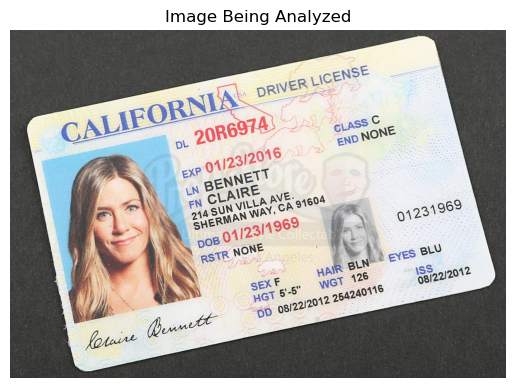

In [18]:
image_path = "license2.jpg"

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Image Being Analyzed")
plt.show()

In [19]:
# Open image file and read its bytes
with open(image_path, 'rb') as image:
    image_bytes = image.read()

# Detect text in the image
response = rekognition_client.detect_text(
    Image={'Bytes': image_bytes}
)

# Print detected text
print("Detected Text:")
for text_detail in response['TextDetections']:
    print(f"Detected: {text_detail['DetectedText']}, Confidence: {text_detail['Confidence']:.2f}%")

Detected Text:
Detected: USA, Confidence: 97.16%
Detected: DRIVER LICENSE, Confidence: 99.17%
Detected: CALIFORNIA, Confidence: 99.32%
Detected: 20R6974, Confidence: 99.33%
Detected: DL, Confidence: 99.20%
Detected: CLASS с, Confidence: 81.25%
Detected: END NONE, Confidence: 99.26%
Detected: EXP 01/23/2016, Confidence: 99.03%
Detected: LN BENNETT, Confidence: 99.09%
Detected: FN CLAIRE, Confidence: 99.06%
Detected: 214 SUN VILLA AVE., Confidence: 99.00%
Detected: SHERMAN WAY, CA 91604, Confidence: 98.86%
Detected: DOB 01/23/1969, Confidence: 98.84%
Detected: Collectà, Confidence: 56.90%
Detected: 01231969, Confidence: 98.80%
Detected: RSTR NONE, Confidence: 98.74%
Detected: EYES BLU, Confidence: 98.95%
Detected: HAIR BLN, Confidence: 99.16%
Detected: SEX F, Confidence: 98.85%
Detected: WGT 126, Confidence: 99.23%
Detected: ISS, Confidence: 99.20%
Detected: HGT 5'-5", Confidence: 98.74%
Detected: 08/22/2012, Confidence: 98.50%
Detected: leraire Bennett, Confidence: 72.12%
Detected: 08/2